# Time Series

## Description

### GitHub連結

[GitHub連結](https://github.com/wesm/pydata-book)

### Required Dataset

## Required Packages

In [1]:
# 如果你還沒裝好以下所需的Python套件，請你先comment in 以下留言，再執行這程式塊。
# 執行完後，請記得將這塊程式再comment out或刪掉。
"""
import sys 
!{ sys.executable } -m pip install numpy
!{ sys.executable } -m pip install pandas
!{ sys.executable } -m pip install python-dateutil
"""

'\nimport sys \n!{ sys.executable } -m pip install numpy\n!{ sys.executable } -m pip install pandas\n!{ sys.executable } -m pip install python-dateutil\n'

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
import pandas as pd
import pytz
from IPython.display import Image
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import percentileofscore
from pandas.tseries.offsets import Hour, Minute, Day, MonthEnd
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse

In [4]:
np.random.seed(12345)

## 11.1 Date and Time Data Types and Tools

In [5]:
now = datetime.now()
now

datetime.datetime(2022, 1, 29, 17, 22, 20, 608480)

In [6]:
now.year, now.month, now.day

(2022, 1, 29)

In [7]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [8]:
delta.days

926

In [9]:
delta.seconds

56700

In [10]:
start = datetime(2011, 1, 7)

In [11]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

##### Types in datetime module

| Type | Description |
| - | - |
| date | Store calendar date (year, month, day) using the Gregorian calendar |
| time | Store time of day as hours, minutes, seconds, and microseconds |
| datetime | Stores both date and time |
| timedelta | Represents the difference between twodatetimevalues (as days, seconds, and microseconds) |
| tzinfo | Base type for storing time zone information |

### Converting Between String and Datetime

In [13]:
stamp = datetime(2011, 1, 3)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [15]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

##### Datetime format specification (ISO C89 compatible)

| Type | Description |
| - | - |
| %Y | Four-digit year |
| %y | Two-digit year |
| %m | Two-digit month [01, 12] |
| %d | Two-digit day [01, 31] |
| %H | Hour (24-hour clock) [00, 23] |
| %I | Hour (12-hour clock) [01, 12] |
| %M | Two-digit minute [00, 59] |
| %S | Second [00, 61] (seconds 60, 61 account for leap seconds) |
| %w | Weekday as integer [0 (Sunday), 6] |
| %U | Week number of the year [00, 53]; Sunday is considered the first day of the week, and days before the first Sunday of the year are “week 0” |
| %W | Week number of the year [00, 53]; Monday is considered the first day of the week, and days before the first Monday of the year are “week 0” |
| %z | UTC time zone offset as+HHMMor-HHMM; empty if time zone naive |
| %F | Shortcut for%Y-%m-%d(e.g.,2012-4-18) |
| %D | Shortcut for%m/%d/%y(e.g.,04/18/12) |

In [16]:
value = '2011-01-03'

In [17]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
datestrs = ['7/6/2011', '8/6/2011']

In [19]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [20]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [21]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [22]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [23]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [24]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [25]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [26]:
idx[2]

NaT

In [27]:
pd.isnull(idx)

array([False, False,  True])

##### Locale-specific date formatting

| Type | Description |
| - | - |
| %a | Abbreviated weekday name |
| %A | Full weekday name |
| %b | Abbreviated month name |
| %B | Full month name |
| %c | Full date and time (e.g., ‘Tue 01 May 2012 04:20:57 PM’) |
| %p | Locale equivalent of AM or PM |
| %x |Locale-appropriate formatted date (e.g., in the United States, May 1, 2012 yields ’05/01/2012’) |
| %X | Locale-appropriate time (e.g., ’04:24:12 PM’)|

## 11.2 Time Series Basics

In [28]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [29]:
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [30]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [31]:
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [32]:
ts.index.dtype

dtype('<M8[ns]')

In [33]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [34]:
stamp = ts.index[2]

In [35]:
ts[stamp]

-0.5194387150567381

In [36]:
ts['1/10/2011']

1.9657805725027142

In [37]:
ts['20110110']

1.9657805725027142

In [38]:
longer_ts = pd.Series(
    np.random.randn(1000),
    index=pd.date_range('1/1/2000', periods=1000)
)
longer_ts

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

In [39]:
longer_ts['2001']

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [40]:
longer_ts['2001-05']

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
2001-05-06    0.569497
2001-05-07    1.489410
2001-05-08    1.264250
2001-05-09   -0.761837
2001-05-10   -0.331617
2001-05-11   -1.751315
2001-05-12    0.628894
2001-05-13    0.282502
2001-05-14   -1.338139
2001-05-15   -0.500607
2001-05-16    0.121645
2001-05-17    1.708323
2001-05-18   -0.970999
2001-05-19   -0.619332
2001-05-20   -0.726708
2001-05-21    1.221655
2001-05-22    0.503699
2001-05-23   -1.387874
2001-05-24    0.204851
2001-05-25    0.603705
2001-05-26    0.545680
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, dtype: float64

In [41]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [42]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [43]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [44]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [45]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [46]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])

In [47]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


### Time Series with Duplicate Indices

In [48]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

In [49]:
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [50]:
dup_ts.index.is_unique

False

In [51]:
dup_ts['1/3/2000']

4

In [52]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [53]:
grouped = dup_ts.groupby(level=0) 

In [54]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [55]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 Data Ranges, Frequencies, and Shifting

In [56]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [57]:
resample = ts.resample('D')

### Generating Date Ranges

In [58]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [59]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [60]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

##### Base time series frequencies (not comprehensive)

| Alias | Offset type | Description |
| - | - | - |
| D | Day | Calendar daily |
| B | BusinessDay | Business daily |
| H | Hour | Hourly |
| T or min | Minute | Minutely |
| S | Second | Secondly |
| L or ms | Milli | Millisecond (1/1,000 of 1 second) |
| U | Micro | Microsecond (1/1,000,000 of 1 second) |
| M | MonthEnd | Last calendar day of month |
| BM | BusinessMonthEnd | Last business day (weekday) of month |
| MS | MonthBegin | First calendar day of month |
| BMS | BusinessMonthBegin | First weekday of month |
| W-MON, W-TUE, ... | Week | Weekly on given day of week (MON, TUE, WED, THU, FRI, SAT, or SUN) |
| WOM-1MON, WOM-2MON, ... | WeekOfMonth | Generate weekly dates in the first, second, third, or fourth week of the month (e.g.,WOM-3FRIfor the third Friday of each month) |
| Q-JAN, Q-FEB, ... | QuarterEnd | Quarterly dates anchored on last calendar day of each month, for year ending in indicated month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC) |
| BQ-JAN, BQ-FEB, ... | BusinessQuarterEnd | Quarterly dates anchored on last weekday day of each month, for year ending in indicated month |
| QS-JAN, QS-FEB, ... | QuarterBegin | Quarterly dates anchored on first calendar day of each month, for year ending in indicated month |
| BQS-JAN, BQS-FEB, ... | BusinessQuarterBegin | Quarterly dates anchored on first weekday day of each month, for year ending in indicated month |
| A-JAN, A-FEB, ... | YearEnd | Annual dates anchored on last calendar day of given month (JAN, FEB, MAR, APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, or DEC) |
| BA-JAN, BA-FEB, ... | BusinessYearEnd | Annual dates anchored on last weekday of given month |
| AS-JAN, AS-FEB, ... | YearBegin | Annual dates anchored on first day of given month |
| BAS-JAN, BAS-FEB, ... | BusinessYearBegin | Annual dates anchored on first weekday of given month |

In [61]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [62]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [63]:
hour = Hour()
hour

<Hour>

In [64]:
hour

<Hour>

In [65]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [66]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [67]:
Hour(2) + Minute(30)

<150 * Minutes>

In [68]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [69]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

In [70]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64

In [71]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.066748
2000-04-30    0.838639
Freq: M, dtype: float64

In [72]:
ts.shift(-2)

2000-01-31   -0.117388
2000-02-29   -0.517795
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [73]:
ts / ts.shift(1) - 1

2000-01-31          NaN
2000-02-29   -13.564241
2000-03-31    -1.139975
2000-04-30     3.410958
Freq: M, dtype: float64

In [74]:
ts.shift(2, freq='M')

2000-03-31   -0.066748
2000-04-30    0.838639
2000-05-31   -0.117388
2000-06-30   -0.517795
Freq: M, dtype: float64

In [75]:
ts.shift(3, freq='D')

2000-02-03   -0.066748
2000-03-03    0.838639
2000-04-03   -0.117388
2000-05-03   -0.517795
dtype: float64

In [76]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.066748
2000-02-29 01:30:00    0.838639
2000-03-31 01:30:00   -0.117388
2000-04-30 01:30:00   -0.517795
dtype: float64

#### Shifting dates with offsets

In [77]:
now = datetime(2011, 11, 17)

In [78]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [79]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [80]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [81]:
offset = MonthEnd()

In [82]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [83]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [84]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.116696
2000-01-19    2.389645
2000-01-23   -0.932454
2000-01-27   -0.229331
2000-01-31   -1.140330
2000-02-04    0.439920
2000-02-08   -0.823758
2000-02-12   -0.520930
2000-02-16    0.350282
2000-02-20    0.204395
2000-02-24    0.133445
2000-02-28    0.327905
2000-03-03    0.072153
2000-03-07    0.131678
2000-03-11   -1.297459
2000-03-15    0.997747
2000-03-19    0.870955
2000-03-23   -0.991253
2000-03-27    0.151699
2000-03-31    1.266151
Freq: 4D, dtype: float64

In [85]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
dtype: float64

In [86]:
ts.resample('M').mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
Freq: M, dtype: float64

## 11.4 Time Zone Handling

In [87]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [88]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [89]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [90]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [91]:
print(ts.index.tz)

None


In [92]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [93]:
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [94]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.202469
2012-03-10 09:30:00+00:00    0.050718
2012-03-11 09:30:00+00:00    0.639869
2012-03-12 09:30:00+00:00    0.597594
2012-03-13 09:30:00+00:00   -0.797246
2012-03-14 09:30:00+00:00    0.472879
Freq: D, dtype: float64

In [95]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [96]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.202469
2012-03-10 04:30:00-05:00    0.050718
2012-03-11 05:30:00-04:00    0.639869
2012-03-12 05:30:00-04:00    0.597594
2012-03-13 05:30:00-04:00   -0.797246
2012-03-14 05:30:00-04:00    0.472879
Freq: D, dtype: float64

In [97]:
ts_eastern = ts.tz_localize('America/New_York')

In [98]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.202469
2012-03-10 14:30:00+00:00    0.050718
2012-03-11 13:30:00+00:00    0.639869
2012-03-12 13:30:00+00:00    0.597594
2012-03-13 13:30:00+00:00   -0.797246
2012-03-14 13:30:00+00:00    0.472879
dtype: float64

In [99]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.202469
2012-03-10 15:30:00+01:00    0.050718
2012-03-11 14:30:00+01:00    0.639869
2012-03-12 14:30:00+01:00    0.597594
2012-03-13 14:30:00+01:00   -0.797246
2012-03-14 14:30:00+01:00    0.472879
dtype: float64

In [100]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operations with Time Zone - Aware Timestamp Objects

In [101]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [102]:
stamp_utc = stamp.tz_localize('utc')

In [103]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [104]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [105]:
stamp_utc.value

1299902400000000000

In [106]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [107]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [108]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [109]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [110]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [111]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [112]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.522356
2012-03-08 09:30:00   -0.546348
2012-03-09 09:30:00   -0.733537
2012-03-12 09:30:00    1.302736
2012-03-13 09:30:00    0.022199
2012-03-14 09:30:00    0.364287
2012-03-15 09:30:00   -0.922839
2012-03-16 09:30:00    0.312656
2012-03-19 09:30:00   -1.128497
2012-03-20 09:30:00   -0.333488
Freq: B, dtype: float64

In [113]:
ts1 = ts[:7].tz_localize('Europe/London')

In [114]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [115]:
result = ts1 + ts2

In [116]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## 11.5 Periods and Period Arithmetic

In [117]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [118]:
p + 5

Period('2012', 'A-DEC')

In [119]:
p - 2

Period('2005', 'A-DEC')

In [120]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [121]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [122]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.514551
2000-02   -0.559782
2000-03   -0.783408
2000-04   -1.797685
2000-05   -0.172670
2000-06    0.680215
Freq: M, dtype: float64

In [123]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [124]:
index = pd. PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### Period Frequency

In [125]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [126]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [127]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [128]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [129]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [130]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

##### Period frequency conversion illustration

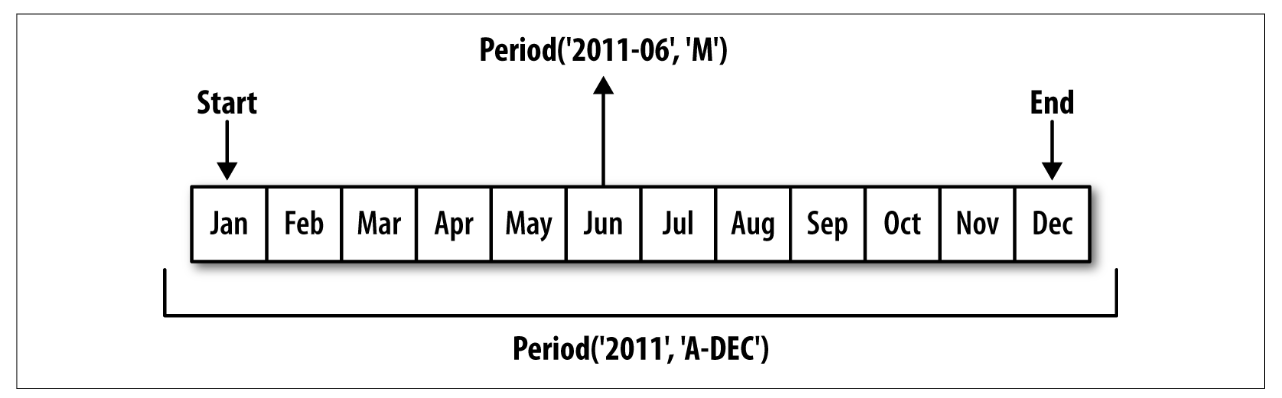

In [131]:
Image('src/images/Period_frequency_conversion_illustration.png')

In [132]:
p = pd.Period('Aug-2007', 'M')

In [133]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [134]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [135]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    1.607578
2007    0.200381
2008   -0.834068
2009   -0.302988
Freq: A-DEC, dtype: float64

In [136]:
ts.asfreq('M', how='start')

2006-01    1.607578
2007-01    0.200381
2008-01   -0.834068
2009-01   -0.302988
Freq: M, dtype: float64

In [137]:
ts.asfreq('B', how='end')

2006-12-29    1.607578
2007-12-31    0.200381
2008-12-31   -0.834068
2009-12-31   -0.302988
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [138]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

##### Different quarterly frequency conventions

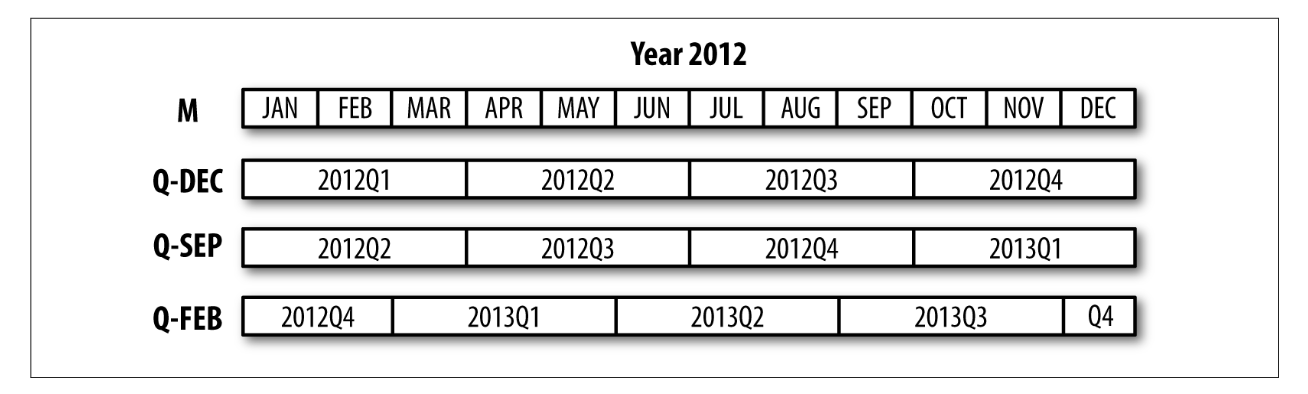

In [139]:
Image('src/images/Different_quarterly.png')

In [140]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [141]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [142]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [143]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [144]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [145]:
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [146]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [147]:
ts.index = new_rng.to_timestamp()

In [148]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### Converting Timestamps to Periods (and Back)

In [149]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [150]:
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    1.663261
2000-02-29   -0.996206
2000-03-31    1.521760
Freq: M, dtype: float64

In [151]:
pts = ts.to_period()
pts

2000-01    1.663261
2000-02   -0.996206
2000-03    1.521760
Freq: M, dtype: float64

In [152]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [153]:
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

In [154]:
ts2.to_period('M')

2000-01    0.244175
2000-01    0.423331
2000-01   -0.654040
2000-02    2.089154
2000-02   -0.060220
2000-02   -0.167933
Freq: M, dtype: float64

In [155]:
pts = ts2.to_period()
pts

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64

In [156]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.244175
2000-01-30 23:59:59.999999999    0.423331
2000-01-31 23:59:59.999999999   -0.654040
2000-02-01 23:59:59.999999999    2.089154
2000-02-02 23:59:59.999999999   -0.060220
2000-02-03 23:59:59.999999999   -0.167933
Freq: D, dtype: float64

### Creating PeriodIndex from Arrays

In [157]:
data = pd.read_csv('src/csv/macrodata.csv')

In [158]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [159]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [160]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [161]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [162]:
data.index = index

In [163]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 Resampling and Frequency Conversion

In [164]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [165]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    0.631634
2000-01-02   -1.594313
2000-01-03   -1.519937
2000-01-04    1.108752
2000-01-05    1.255853
                ...   
2000-04-05   -0.423776
2000-04-06    0.789740
2000-04-07    0.937568
2000-04-08   -2.253294
2000-04-09   -1.772919
Freq: D, Length: 100, dtype: float64

In [166]:
ts.resample('M').mean()

2000-01-31   -0.165893
2000-02-29    0.078606
2000-03-31    0.223811
2000-04-30   -0.063643
Freq: M, dtype: float64

In [167]:
ts.resample('M', kind='period').mean()

2000-01   -0.165893
2000-02    0.078606
2000-03    0.223811
2000-04   -0.063643
Freq: M, dtype: float64

##### Resample method arguments

| Argument | Description |
| - | - |
| freq | String or DateOffset indicating desired resampled frequency (e.g., ‘M', ’5min', or Second(15)) |
| axis | Axis to resample on; default axis=0 |
| fill_method | How to interpolate when upsampling, as in'ffill'or'bfill'; by default does no interpolation |
| closed | In downsampling, which end of each interval is closed (inclusive), 'right' or 'left' |
| label | In downsampling, how to label the aggregated result, with the 'right' or 'left' bin edge (e.g., the 9:30 to 9:35 five-minute interval could be labeled9:30or9:35) |
| loffset | Time adjustment to the bin labels, such as '-1s' / Second(-1) to shift the aggregate labels one second earlier |
| limit | When forward or backward filling, the maximum number of periods to fill |
| kind | Aggregate to periods ('period') or timestamps ('timestamp'); defaults to the type of index the time series has |
| convention | When resampling periods, the convention ('start' or 'end') for converting the low-frequency period to high frequency; defaults to'end' |

### Downsampling

In [168]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [169]:
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [170]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [171]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [172]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

##### Five-minute resampling illustration of closed, label conventions

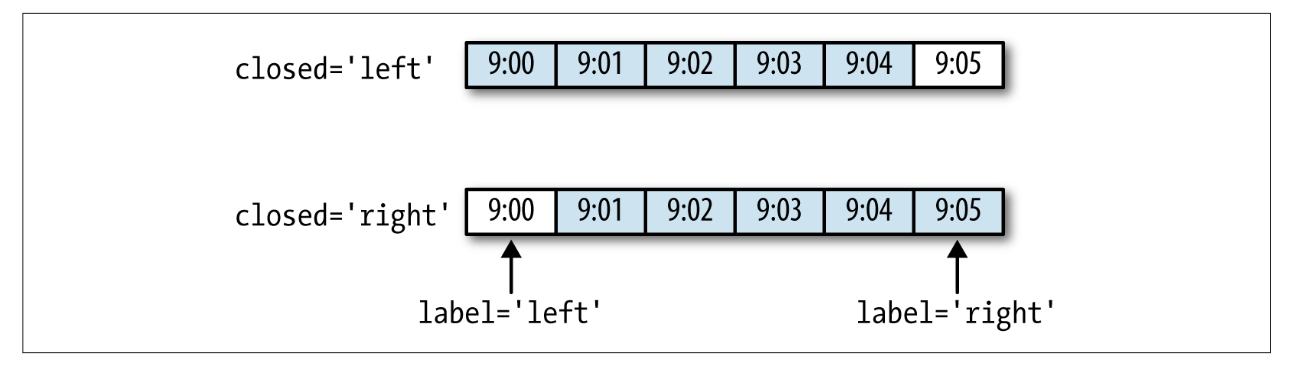

In [173]:
Image('src/images/Five-minute.png')

In [174]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

/var/folders/_5/rbp8ycrj4t95c58km4gtz5340000gn/T/ipykernel_15105/649735751.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right', label='right', loffset='-1s').sum()


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

#### Open-Hight-Low-Close(OHLC) resampling

In [175]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation

In [176]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [177]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [178]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,-0.896431,0.677263,0.036503,0.087102
2000-01-09,-0.896431,0.677263,0.036503,0.087102
2000-01-10,-0.896431,0.677263,0.036503,0.087102
2000-01-11,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [179]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [180]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-13,-0.046662,0.927238,0.482284,-0.867130


### Resampling with Periods

In [181]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [182]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.493841,-0.155434,1.397286,1.507055
2000-02,-1.179442,0.443171,1.395676,-0.529658
2000-03,0.787358,0.248845,0.743239,1.267746
2000-04,1.302395,-0.272154,-0.051532,-0.467740
2000-05,-1.040816,0.426419,0.312945,-1.115689


In [183]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.556703,0.016631,0.111873,-0.027445
2001,0.046303,0.163344,0.251503,-0.157276


In [184]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.556703,0.016631,0.111873,-0.027445
2000Q2,0.556703,0.016631,0.111873,-0.027445
2000Q3,0.556703,0.016631,0.111873,-0.027445
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.046303,0.163344,0.251503,-0.157276
2001Q2,0.046303,0.163344,0.251503,-0.157276
2001Q3,0.046303,0.163344,0.251503,-0.157276
2001Q4,0.046303,0.163344,0.251503,-0.157276


In [185]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276


In [186]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276
2002Q1,0.046303,0.163344,0.251503,-0.157276
2002Q2,0.046303,0.163344,0.251503,-0.157276
2002Q3,0.046303,0.163344,0.251503,-0.157276


## 11.7 Moving Window Functions

In [187]:
close_px_all = pd.read_csv('src/csv/stock_px_2.csv',
                           parse_dates=True, index_col=0)

In [188]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [189]:
close_px = close_px.resample('B').ffill()

<IPython.core.display.Javascript object>


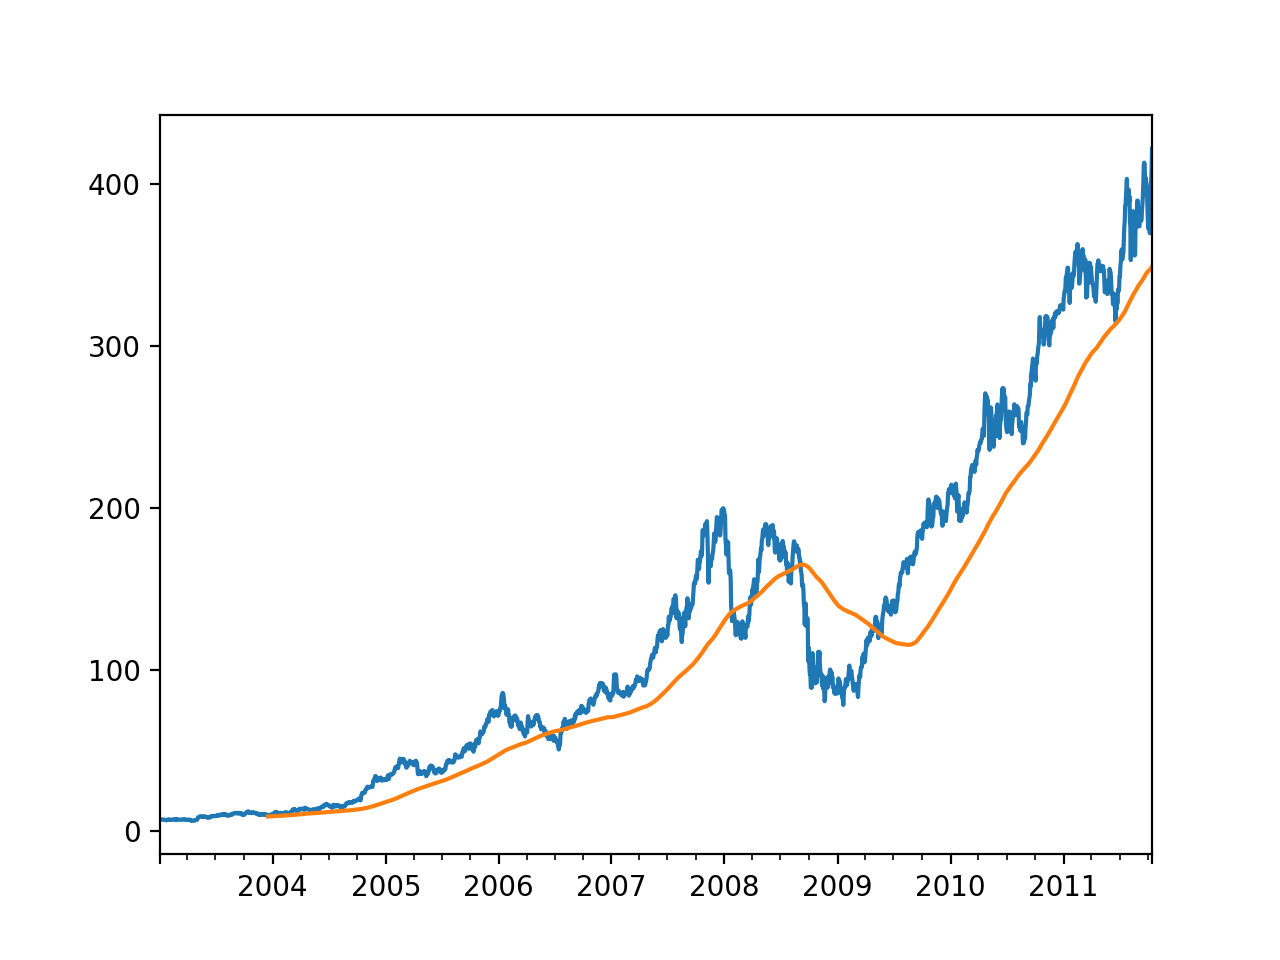

In [190]:
fig = plt.figure()

In [191]:
close_px.AAPL.plot()

<AxesSubplot:>

In [192]:
close_px.AAPL.rolling(250).mean().plot()

<AxesSubplot:>

In [193]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [194]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<IPython.core.display.Javascript object>


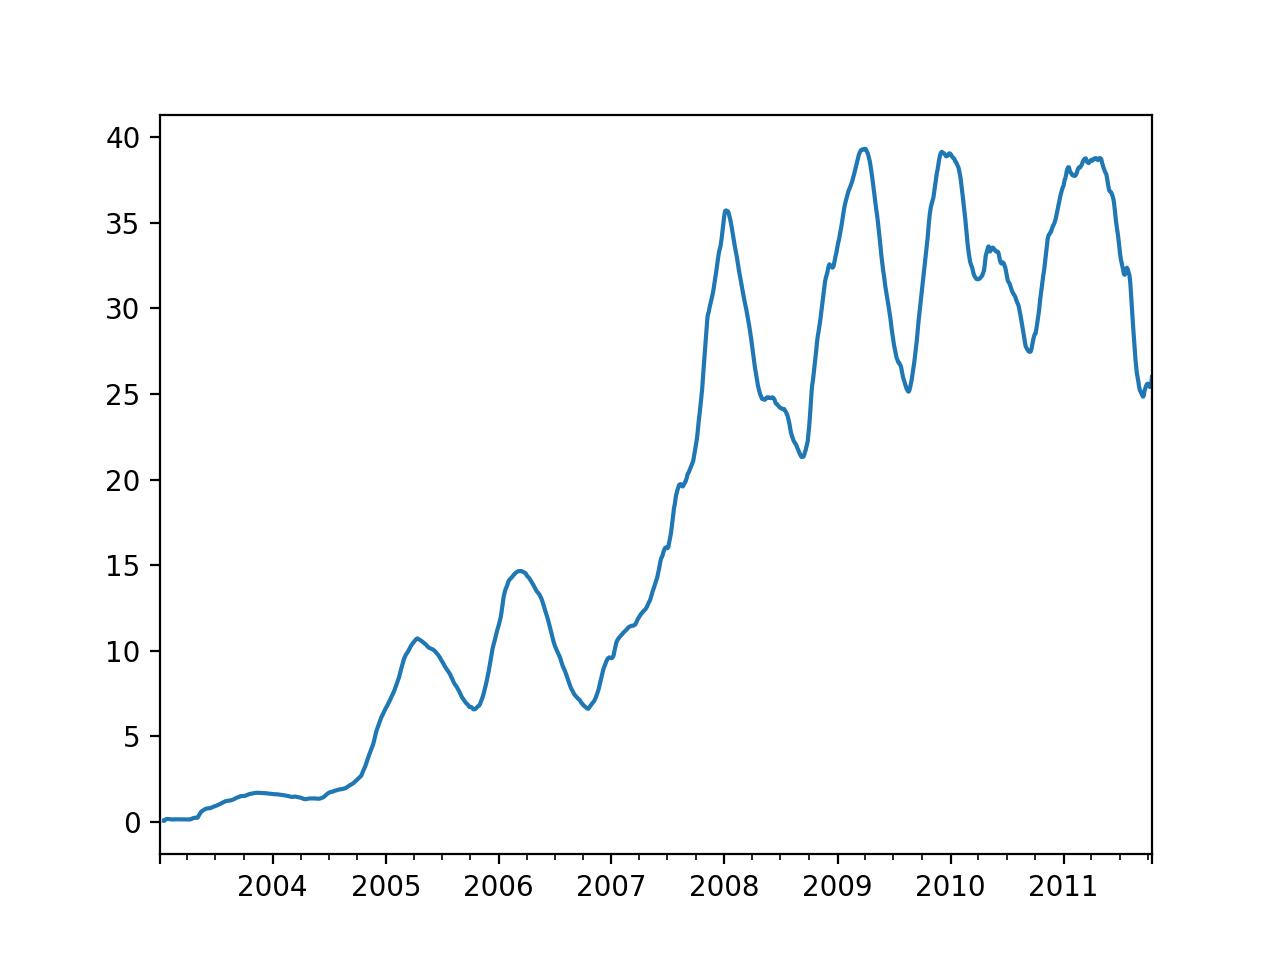

In [195]:
fig = plt.figure()

In [196]:
appl_std250.plot()

<AxesSubplot:>

In [197]:
expanding_mean = appl_std250.expanding().mean()

<IPython.core.display.Javascript object>


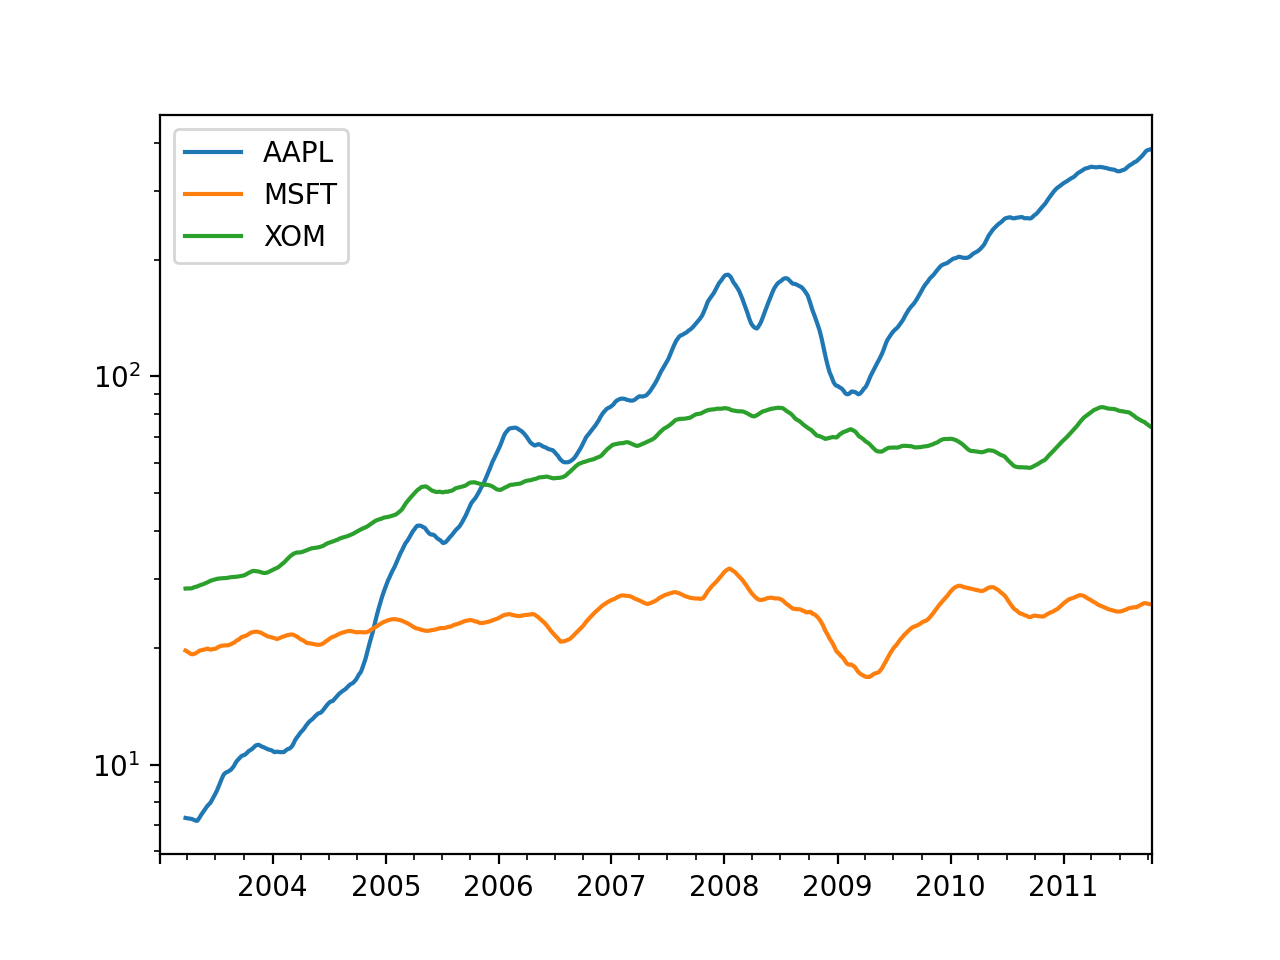

<AxesSubplot:>

In [198]:
close_px.rolling(60).mean().plot(logy=True)

In [199]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

In [200]:
aapl_px = close_px.AAPL['2006': '2007']

In [201]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [202]:
ewma60 = aapl_px.ewm(span=30).mean()

<IPython.core.display.Javascript object>


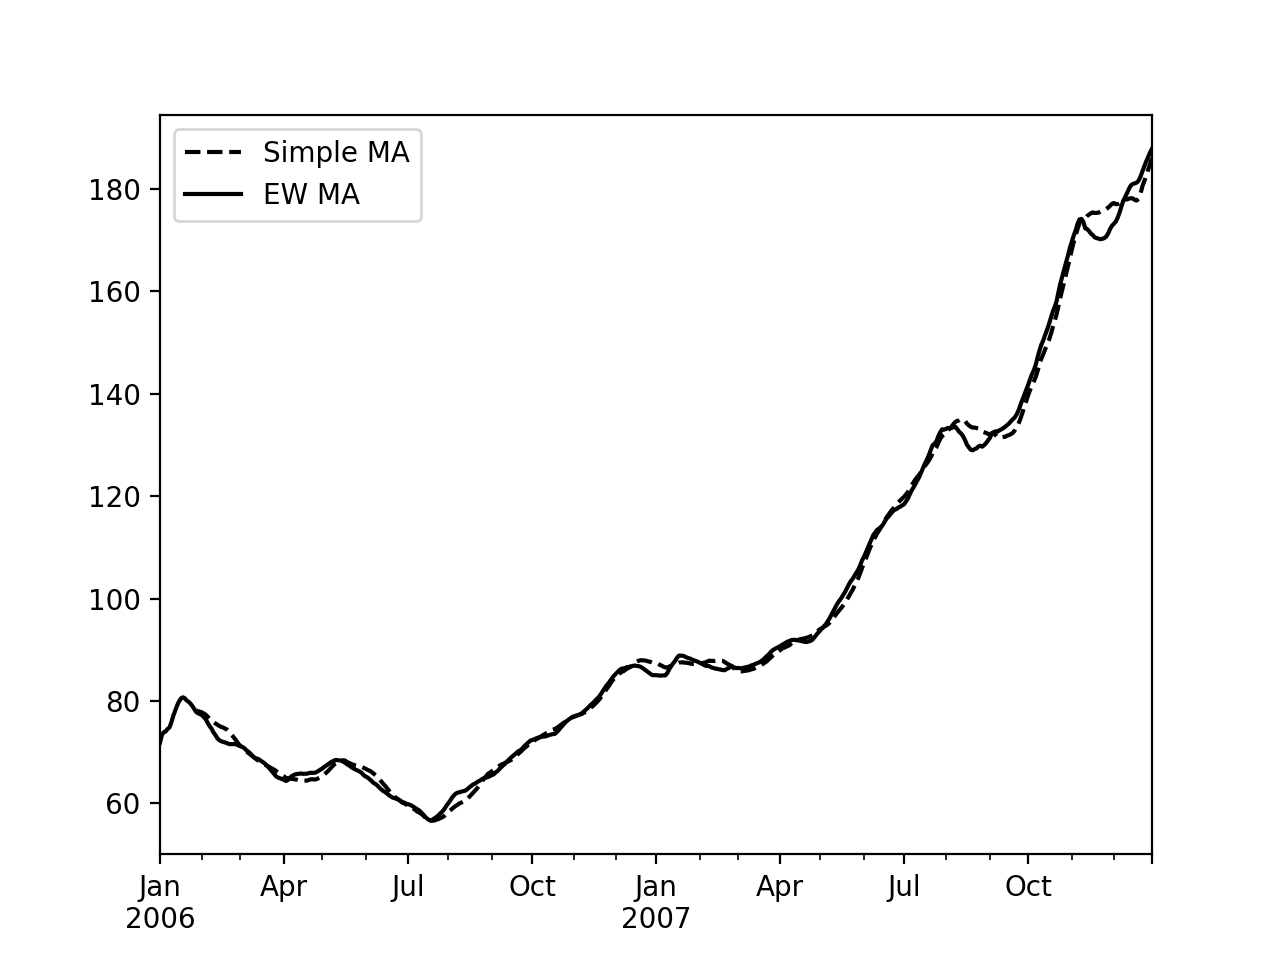

In [203]:
fig = plt.figure()

In [204]:
ma60.plot(style='k--', label='Simple MA')

<AxesSubplot:>

In [205]:
ewma60.plot(style='k-', label='EW MA')

<AxesSubplot:>

In [206]:
plt.legend()

### Binary Moving Window Functions

In [207]:
spx_px = close_px_all['SPX']

In [208]:
spx_rets = spx_px.pct_change()

In [209]:
returns = close_px.pct_change()

In [210]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

<IPython.core.display.Javascript object>


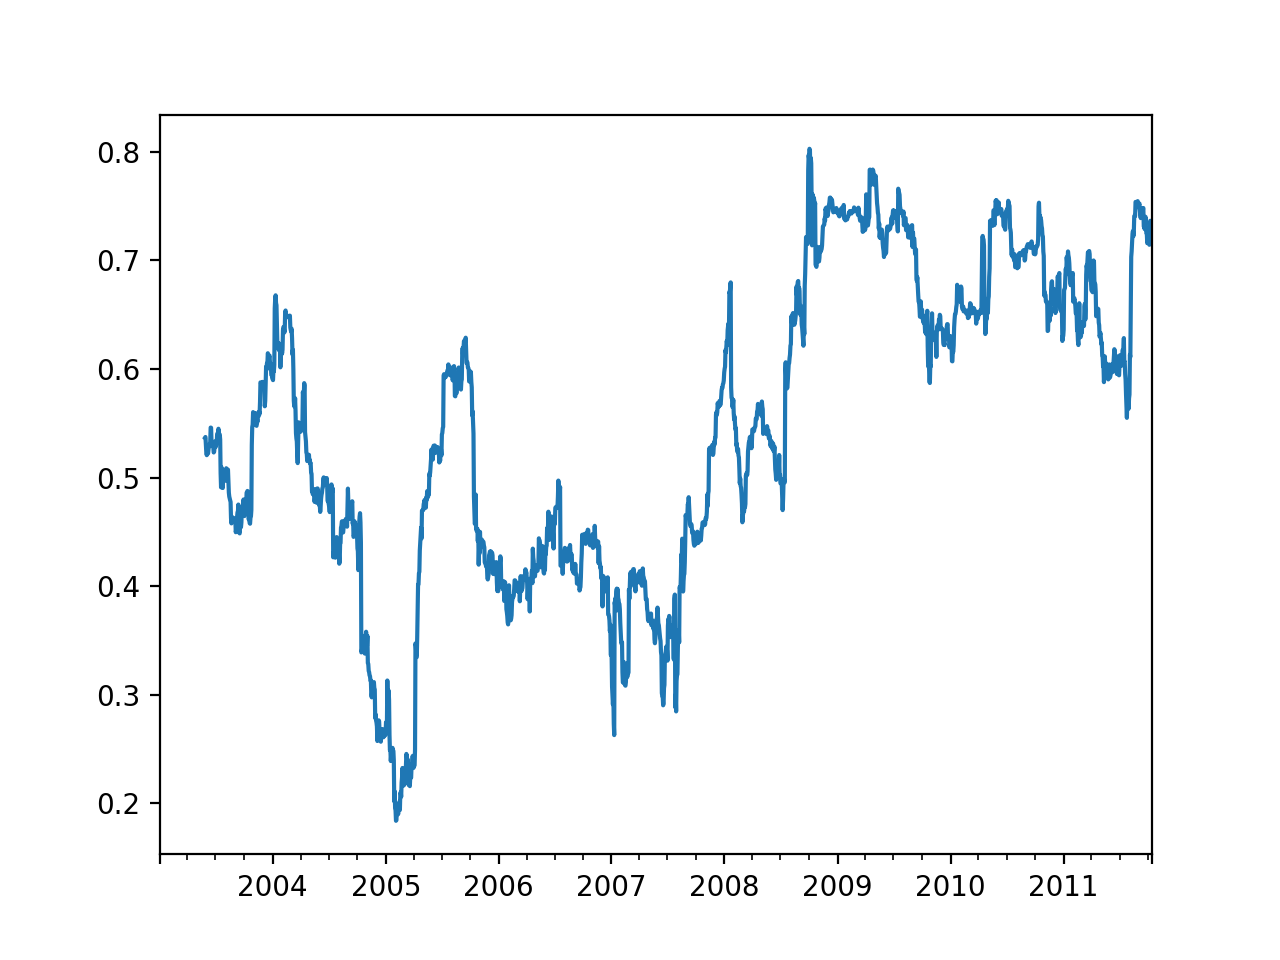

In [211]:
fig = plt.figure()

In [212]:
corr.plot()

<AxesSubplot:>

In [213]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

<IPython.core.display.Javascript object>


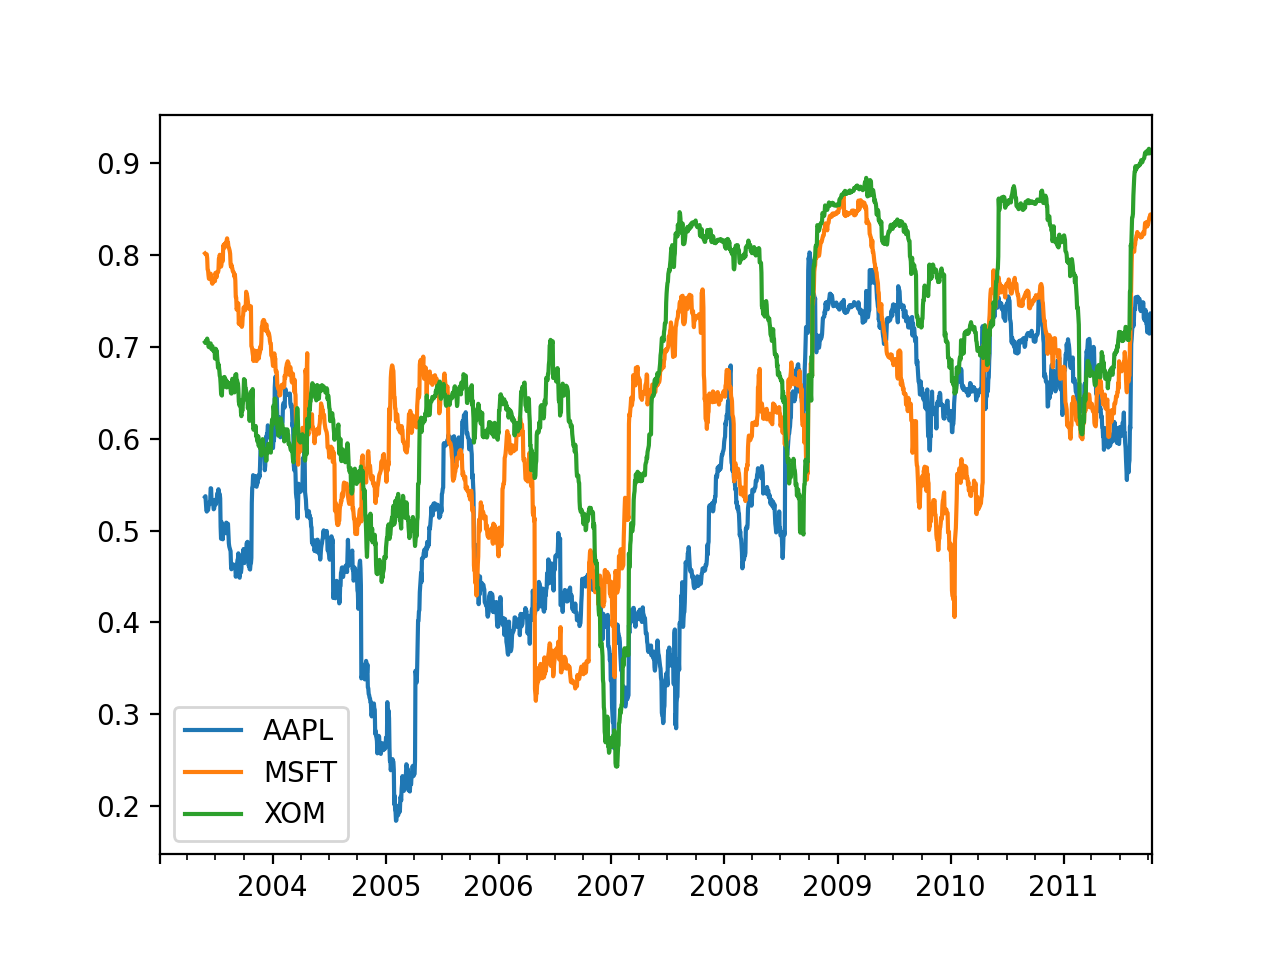

<AxesSubplot:>

In [214]:
corr.plot()

### User-Defined Moving Window Functions

In [215]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [216]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

<IPython.core.display.Javascript object>


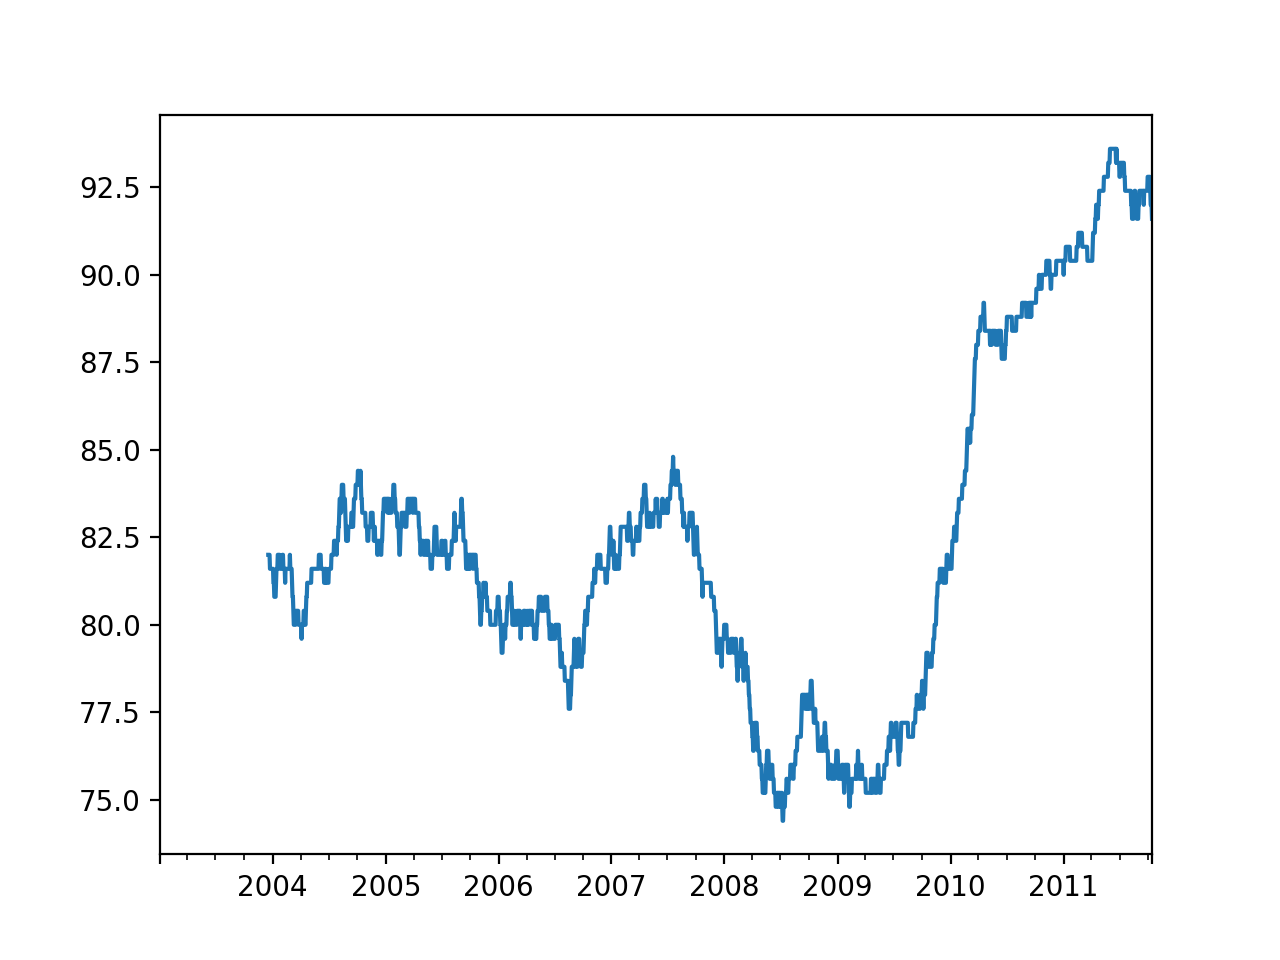

In [217]:
fig = plt.figure()

In [218]:
result.plot()

<AxesSubplot:>

## 11.8 Conclusion